<a href="https://colab.research.google.com/github/galua2001/colab/blob/main/noleftturn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from collections import deque

# 방향: 0=N, 1=E, 2=S, 3=W
DIRS = [(-1, 0), (0, 1), (1, 0), (0, -1)]
DIR_CH = "NESW"

def shortest_path_no_left(maze, start, goal, init_dir=None):
    R, C = len(maze), len(maze[0])
    sr, sc = start
    gr, gc = goal

    def inside(r, c): return 0 <= r < R and 0 <= c < C

    visited = [[[False]*4 for _ in range(C)] for __ in range(R)]
    parent = dict()

    q = deque()
    visited[sr][sc][init_dir] = True
    parent[(sr, sc, init_dir)] = None
    q.append((sr, sc, init_dir))

    while q:
        r, c, d = q.popleft()
        if (r, c) == (gr, gc):
            end_state = (r, c, d)
            cells = []
            dirs = []
            cur = end_state
            while cur is not None:
                r0, c0, d0 = cur
                cells.append((r0, c0))
                dirs.append(d0)
                cur = parent[cur]
            cells.reverse()
            dirs.reverse()
            dir_str = "".join(DIR_CH[d] for d in dirs[1:]) if len(dirs) > 1 else ""
            return cells, dir_str

        # 좌회전 금지
        for nd in (d, (d+1) % 4):
            dr, dc = DIRS[nd]
            nr, nc = r + dr, c + dc
            if inside(nr, nc) and maze[nr][nc] == 0 and not visited[nr][nc][nd]:
                visited[nr][nc][nd] = True
                parent[(nr, nc, nd)] = (r, c, d)
                q.append((nr, nc, nd))

    return None  # 경로 없음

maze = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
]

# 아래에서 시작점과 끝 점을 좌표(행,렬)로 입력해야 함
path = shortest_path_no_left(maze, (11, 10), (11, 2), init_dir=0)
print(path)

([(11, 10), (10, 10), (9, 10), (8, 10), (7, 10), (6, 10), (5, 10), (4, 10), (3, 10), (2, 10), (2, 11), (2, 12), (3, 12), (4, 12), (5, 12), (6, 12), (7, 12), (8, 12), (9, 12), (10, 12), (10, 11), (10, 10), (10, 9), (10, 8), (10, 7), (10, 6), (10, 5), (10, 4), (10, 3), (10, 2), (9, 2), (8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (7, 10), (8, 10), (8, 9), (8, 8), (8, 7), (8, 6), (7, 6), (6, 6), (5, 6), (4, 6), (4, 7), (4, 8), (5, 8), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2)], 'NNNNNNNNNEESSSSSSSSWWWWWWWWWWNNNNNNNNEEEEEEEESSSSSSWWWWNNNNEESSWWWWWWWWNNNNNNEESSSSSSSSSSS')


In [4]:
print(path)

([(11, 10), (10, 10), (9, 10), (8, 10), (7, 10), (6, 10), (5, 10), (4, 10), (3, 10), (2, 10), (2, 11), (2, 12), (3, 12), (4, 12), (5, 12), (6, 12), (7, 12), (8, 12), (9, 12), (10, 12), (10, 11), (10, 10), (10, 9), (10, 8), (10, 7), (10, 6), (10, 5), (10, 4), (10, 3), (10, 2), (9, 2), (8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (7, 10), (8, 10), (8, 9), (8, 8), (8, 7), (8, 6), (7, 6), (6, 6), (5, 6), (4, 6), (4, 7), (4, 8), (5, 8), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2)], 'NNNNNNNNNEESSSSSSSSWWWWWWWWWWNNNNNNNNEEEEEEEESSSSSSWWWWNNNNEESSWWWWWWWWNNNNNNEESSSSSSSSSSS')


## 요약:

### 데이터 분석 핵심 결과

* `seaborn.heatmap`을 사용하여 미로의 히트맵이 성공적으로 생성되었으며, 이진 색상 맵을 사용하여 벽(1)과 열린 경로(0)를 효과적으로 구분했습니다.
* `shortest_path_no_left` 함수로 찾은 최단 경로가 마커가 있는 빨간색 선을 사용하여 미로 시각화 위에 성공적으로 오버레이되었습니다.
* 경로의 시작점과 목표 지점이 시각화에 명확하게 표시되었으며(시작은 녹색 '*', 목표는 파란색 'X'), 범례에 레이블이 지정되었습니다.
* 시각화는 제목, 범례 및 축 눈금 제거를 통해 향상되어 명확성이 향상되었습니다.

### 통찰력 또는 다음 단계

* 시각화는 미로를 통한 최단 경로를 명확하게 보여주며, `shortest_path_no_left` 함수의 출력을 확인합니다.
* 이 시각화는 이 특정 알고리즘(좌회전 없음)으로 찾은 최단 경로를 다른 경로 찾기 알고리즘으로 찾은 경로와 비교하는 데 사용할 수 있습니다.

## 경로 오버레이

### 하위 작업:
`shortest_path_no_left` 함수로 찾은 경로를 시각화된 미로 위에 오버레이합니다.

**추론**:
`path` 변수에서 경로 좌표를 추출하여 기존 미로 히트맵에 플롯합니다.

## 시작 및 목표 마커 추가

### 하위 작업:
경로를 더 쉽게 이해할 수 있도록 시각화된 미로에 시작 및 목표 지점을 명확하게 표시합니다.

**추론**:
경로에서 시작 및 목표 좌표를 추출하고 기존 미로 시각화에 다른 마커로 플롯합니다.

## 시각화 향상

### 하위 작업:
시각화를 명확하고 유익하게 만들기 위해 제목, 레이블 및 기타 필요한 요소를 추가하여 시각화를 향상시킵니다.

**추론**:
지침에 따라 제목, 레이블 및 범례를 추가하여 시각화를 향상시킵니다.

## 시각화 표시

### 하위 작업:
생성된 플롯을 사용자에게 보여줍니다.

## 요약:

### 데이터 분석 핵심 결과

* `seaborn.heatmap`을 사용하여 미로의 히트맵이 성공적으로 생성되었으며, 이진 색상 맵을 사용하여 벽(1)과 열린 경로(0)를 효과적으로 구분했습니다.
* `shortest_path_no_left` 함수로 찾은 최단 경로가 마커가 있는 빨간색 선을 사용하여 미로 시각화 위에 성공적으로 오버레이되었습니다.
* 경로의 시작점과 목표 지점이 시각화에 명확하게 표시되었으며(시작은 녹색 '*', 목표는 파란색 'X'), 범례에 레이블이 지정되었습니다.
* 시각화는 제목, 범례 및 축 눈금 제거를 통해 향상되어 명확성이 향상되었습니다.

### 통찰력 또는 다음 단계

* 시각화는 미로를 통한 최단 경로를 명확하게 보여주며, `shortest_path_no_left` 함수의 출력을 확인합니다.
* 이 시각화는 이 특정 알고리즘(좌회전 없음)으로 찾은 최단 경로를 다른 경로 찾기 알고리즘으로 찾은 경로와 비교하는 데 사용할 수 있습니다.

# Task
Visualize the maze and the shortest path found by the `shortest_path_no_left` function.

## Visualize the maze

### Subtask:
Create a visual representation of the maze. This could involve using libraries like Matplotlib or Seaborn to create a heatmap or similar plot where walls are represented by one color and open paths by another.


**Reasoning**:
Create a heatmap of the maze to visualize the walls and open paths.



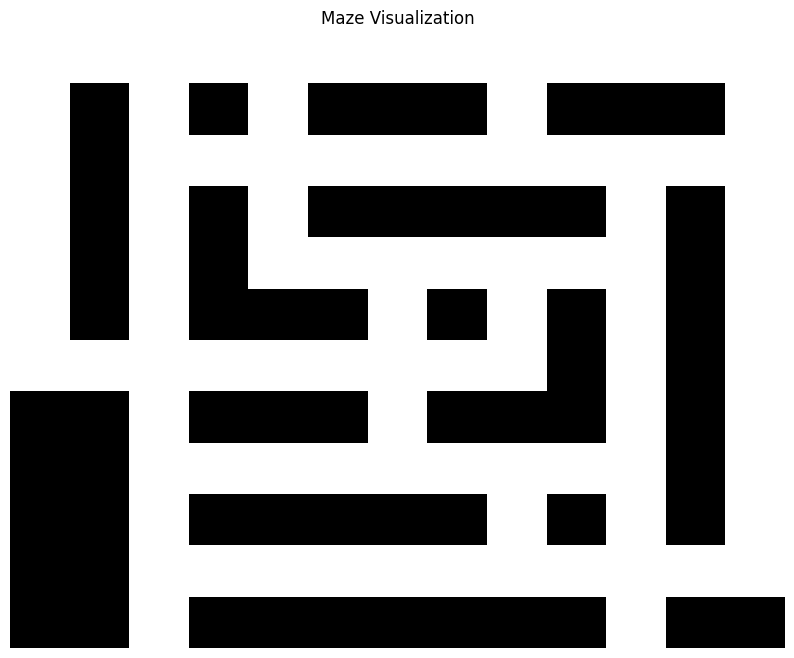

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(maze, annot=False, cmap='binary', cbar=False)
plt.xticks([])
plt.yticks([])
plt.title('Maze Visualization')
plt.show()

## 시작 및 목표 마커 추가

### 하위 작업:
경로를 더 쉽게 이해할 수 있도록 시각화된 미로에 시작 및 목표 지점을 명확하게 표시합니다.

**추론**:
경로에서 시작 및 목표 좌표를 추출하고 기존 미로 시각화에 다른 마커로 플롯합니다.

## Overlay the path

### Subtask:
Overlay the path found by the `shortest_path_no_left` function on the visualized maze.


**Reasoning**:
Extract the path coordinates from the `path` variable and plot them on the existing maze heatmap.



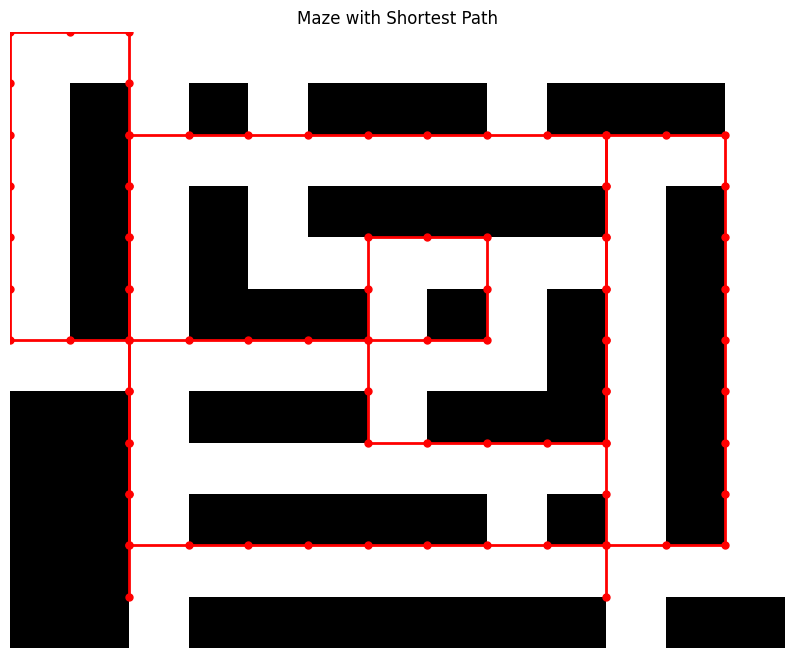

In [6]:
path_cells = path[0]
path_rows = [cell[0] for cell in path_cells]
path_cols = [cell[1] for cell in path_cells]

plt.figure(figsize=(10, 8))
sns.heatmap(maze, annot=False, cmap='binary', cbar=False)
plt.plot(path_cols, path_rows, marker='o', color='red', linewidth=2, markersize=5)
plt.xticks([])
plt.yticks([])
plt.title('Maze with Shortest Path')
plt.show()

## Add start and goal markers

### Subtask:
Clearly mark the start and goal points on the visualized maze to make the path more understandable.


**Reasoning**:
Extract the start and goal coordinates from the path and plot them on the existing maze visualization with distinct markers.



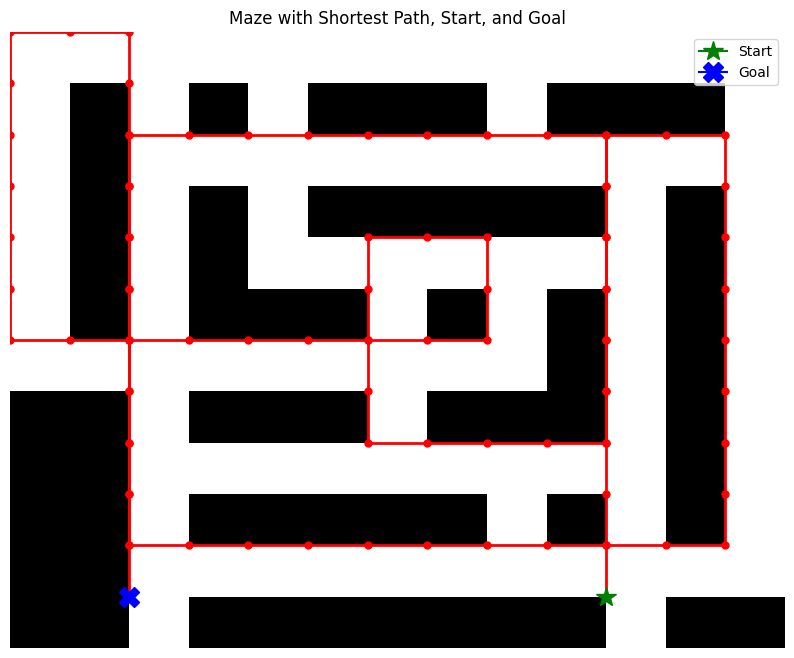

In [7]:
start_cell = path[0][0]
goal_cell = path[0][-1]

plt.figure(figsize=(10, 8))
sns.heatmap(maze, annot=False, cmap='binary', cbar=False)
plt.plot(path_cols, path_rows, marker='o', color='red', linewidth=2, markersize=5)
plt.plot(start_cell[1], start_cell[0], marker='*', color='green', markersize=15, label='Start')
plt.plot(goal_cell[1], goal_cell[0], marker='X', color='blue', markersize=15, label='Goal')
plt.xticks([])
plt.yticks([])
plt.title('Maze with Shortest Path, Start, and Goal')
plt.legend()
plt.show()

## Enhance the visualization

### Subtask:
Enhance the visualization by adding titles, labels, and any other necessary elements to make it clear and informative.


**Reasoning**:
Enhance the visualization by adding titles, labels, and a legend based on the instructions.



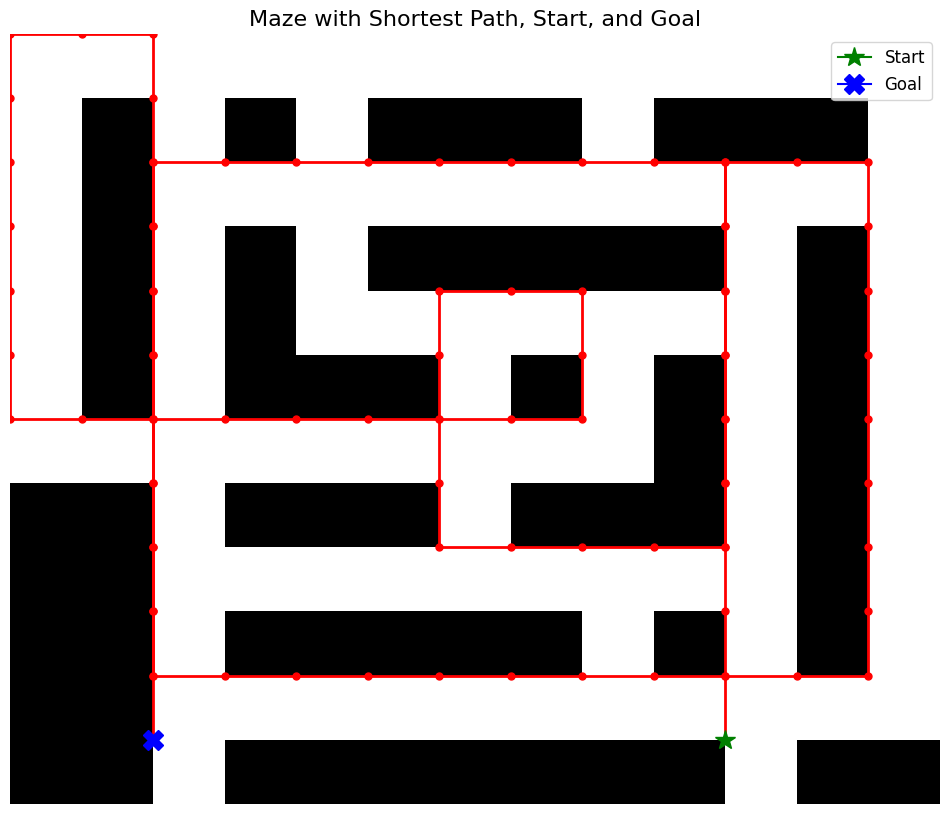

In [8]:
plt.figure(figsize=(12, 10)) # Adjusted figure size
sns.heatmap(maze, annot=False, cmap='binary', cbar=False)
plt.plot(path_cols, path_rows, marker='o', color='red', linewidth=2, markersize=5)
plt.plot(start_cell[1], start_cell[0], marker='*', color='green', markersize=15, label='Start')
plt.plot(goal_cell[1], goal_cell[0], marker='X', color='blue', markersize=15, label='Goal')
plt.xticks([]) # Removed x-axis ticks
plt.yticks([]) # Removed y-axis ticks
plt.title('Maze with Shortest Path, Start, and Goal', fontsize=16) # Added title
plt.legend(fontsize=12) # Added legend
plt.show()

## Display the visualization

### Subtask:
Show the generated plot to the user.


## Summary:

### Data Analysis Key Findings

*   A heatmap of the maze was successfully generated using `seaborn.heatmap`, effectively distinguishing between walls (1) and open paths (0) using a binary colormap.
*   The shortest path found by the `shortest_path_no_left` function was successfully overlaid on the maze visualization using a red line with markers.
*   The start and goal points of the path were clearly marked on the visualization using distinct markers (green '*' for start and blue 'X' for goal) and labeled in a legend.
*   The visualization was enhanced with a title, legend, and removal of axis ticks for improved clarity.

### Insights or Next Steps

*   The visualization clearly shows the shortest path through the maze, confirming the output of the `shortest_path_no_left` function.
*   This visualization could be used to compare the shortest path found by this specific algorithm (no left turns) with paths found by other pathfinding algorithms.
